In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
path =  'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])

In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


绘图

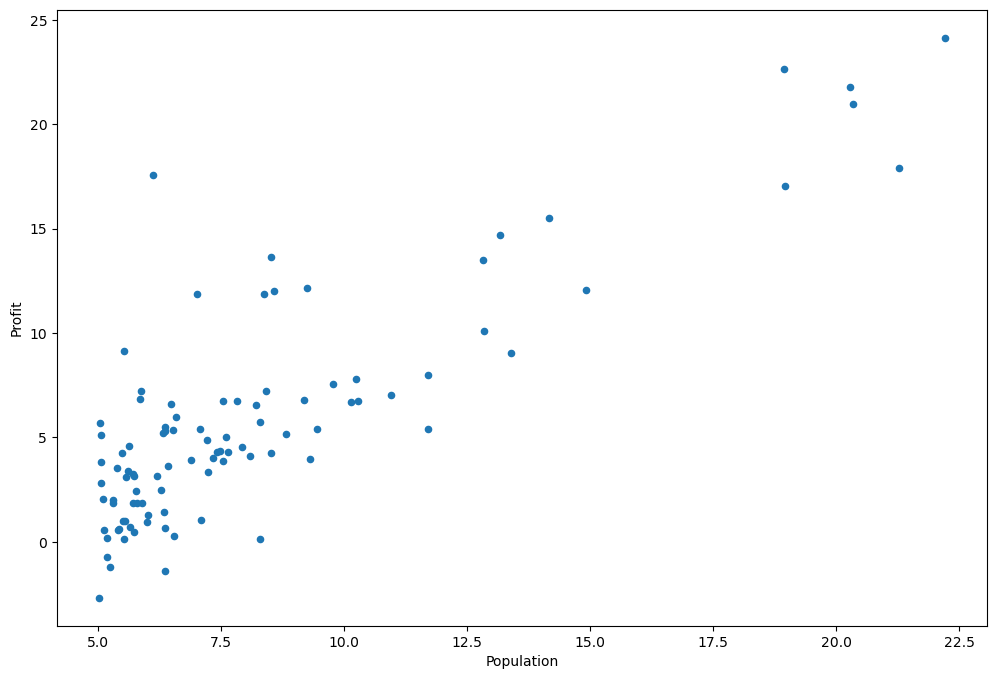

In [30]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [12]:
def computeCost(X, y, theta):
	inner = np.power(((X * theta.T) - y), 2)
	return np.sum(inner) / (2 * len(X))

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
	temp = np.matrix(np.zeros(theta.shape))
	parameters = int(theta.ravel().shape[1])
	cost = np.zeros(iters)
		
	for i in range(iters):
		error = (X * theta.T) - y
		
		for j in range(parameters):
			term = np.multiply(error, X[:,j])
			temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
		
		theta = temp
		cost[i] = computeCost(X, y, theta)
		
	return theta, cost

In [32]:
# Add a column of ones at the beginning
data.insert(0, 'Ones', 1)
	
# Set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [33]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [34]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [35]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

computeCost(X, y, theta)

32.072733877455676

In [59]:
alpha = 0.005
iters = 50
Theta, cost = gradientDescent(X, y, theta, alpha, iters)
computeCost(X, y, Theta)

5.791757171225604

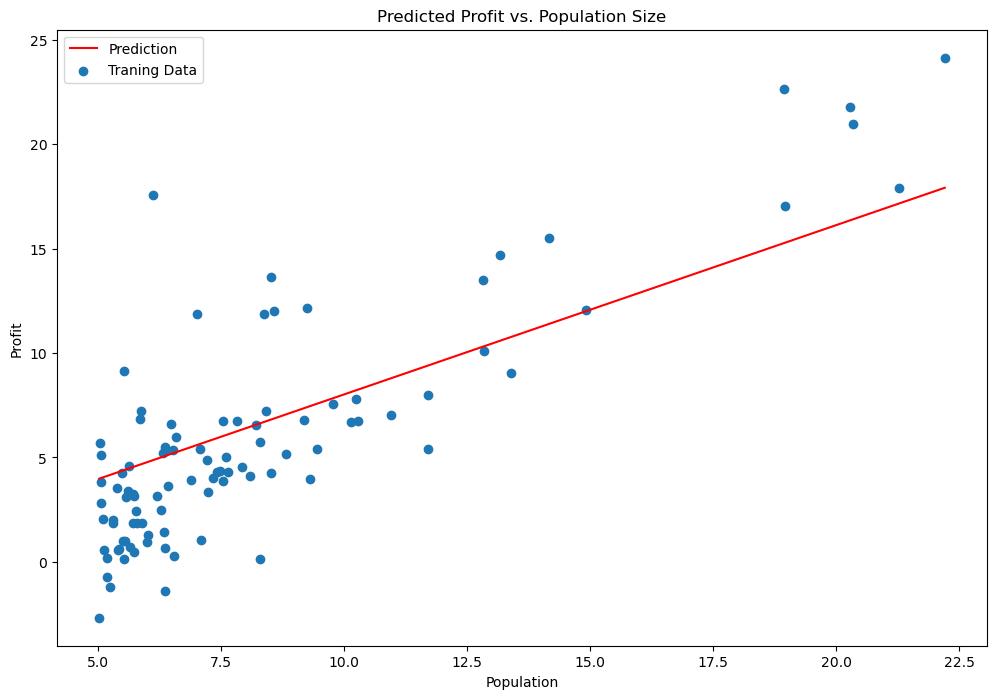

In [60]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = Theta[0, 0] + (Theta[0, 1] * x)
	
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

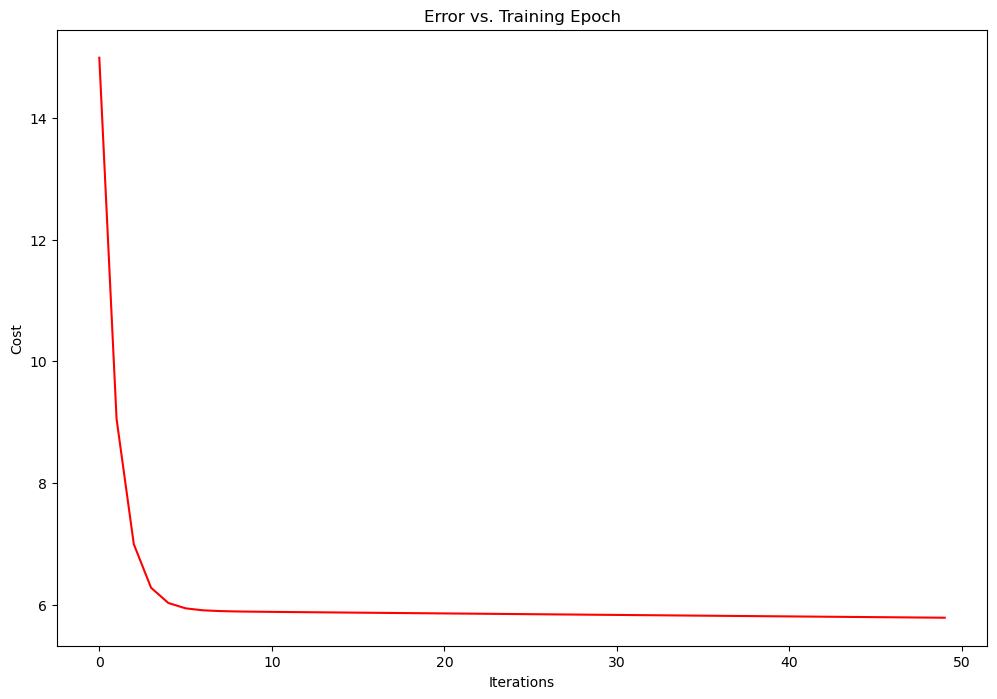

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [17]:
Theta

matrix([[-3.24140214,  1.1272942 ]])

In [45]:
# 生成网格的 theta0 和 theta1 值
theta0_vals = np.linspace(-1000, 1000, 1000)
theta1_vals = np.linspace(-500, 500, 1000)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# 计算成本函数的值
J_vals = np.zeros(theta0_vals.shape)

for i in range(theta0_vals.shape[0]):
    for j in range(theta0_vals.shape[1]):
        t = np.matrix([theta0_vals[i, j], theta1_vals[i, j]])
        J_vals[i, j] = computeCost(X, y, t)


绘制 surface 图

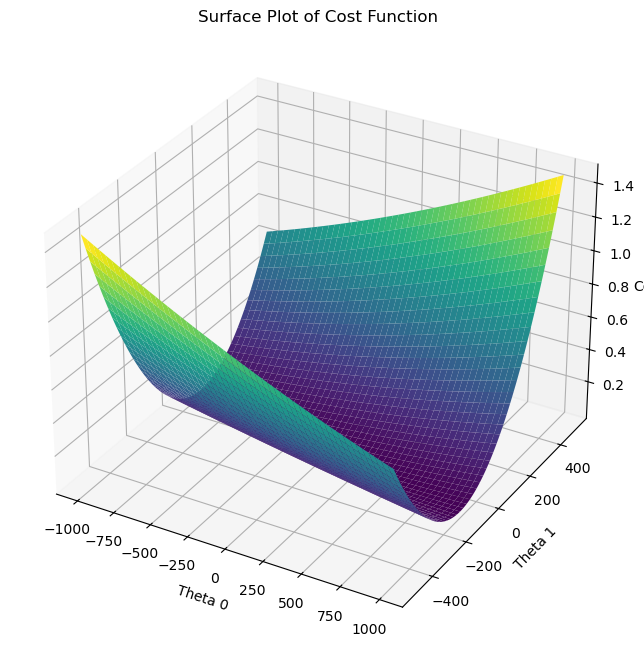

In [46]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制 surface 图
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Surface Plot of Cost Function')

plt.show()

绘制 contour 图

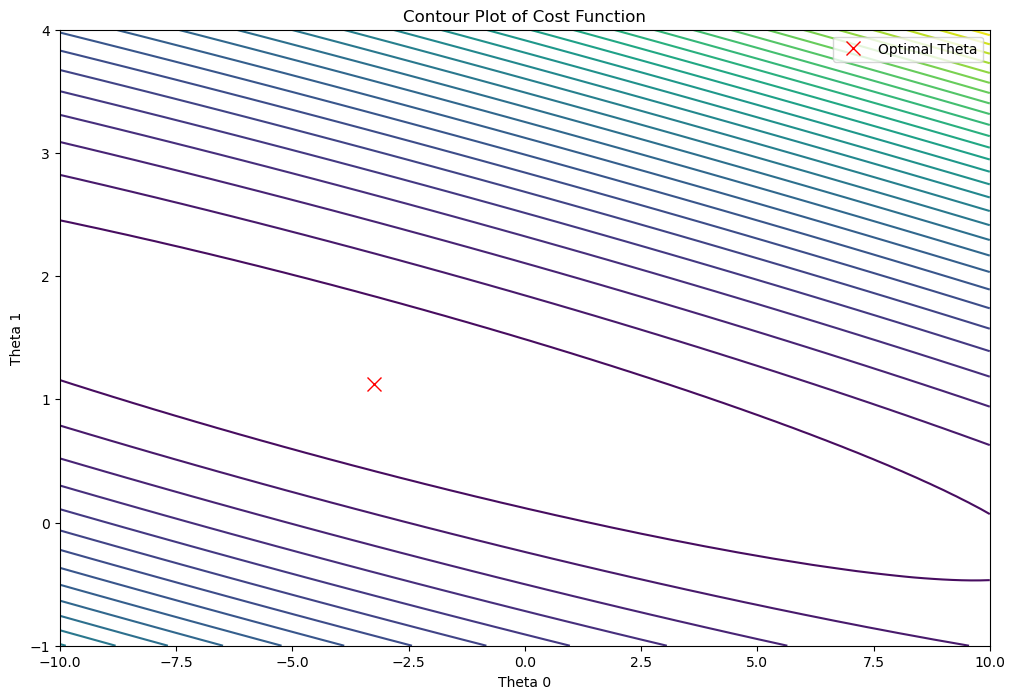

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制 contour 图
contour = ax.contour(theta0_vals, theta1_vals, J_vals, levels=30, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_title('Contour Plot of Cost Function')

# 绘制最优解
ax.plot(Theta[0, 0], Theta[0, 1], 'rx', markersize=10, label='Optimal Theta')
ax.legend()

plt.show()

### scikit-learn

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = data[['Population']]  # Extracting the feature
y = data[['Profit']]
model.fit(X, y)

LinearRegression()

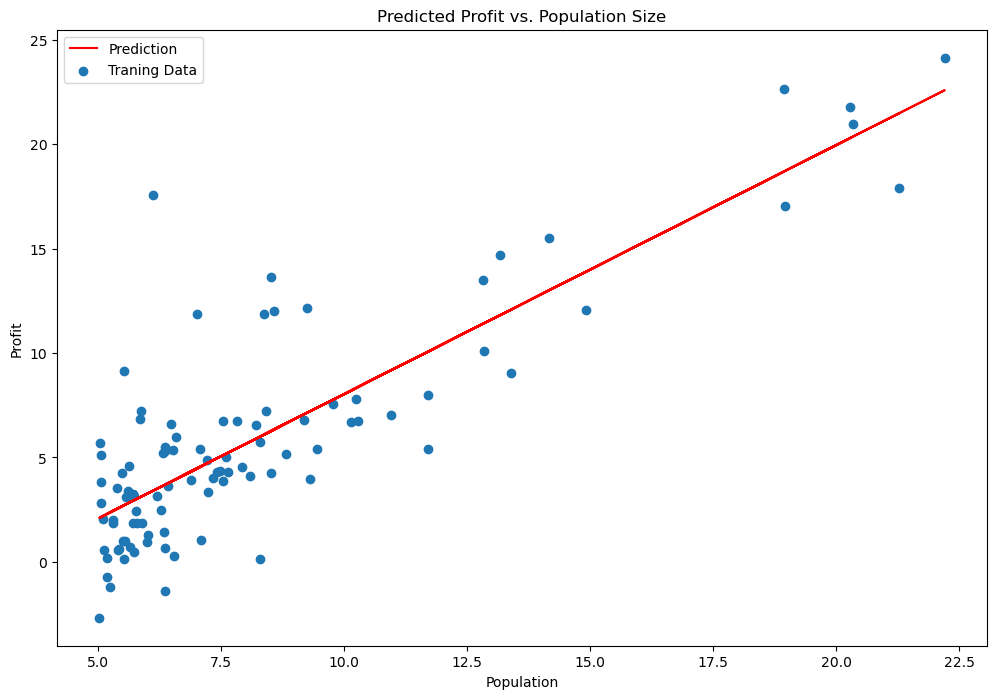

In [27]:
x = X['Population'].values
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data['Profit'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

### normal equation

In [62]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [63]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])